# 🎬 Análisis Exploratorio de Datos (EDA): Anime Dataset

## 📊 Objetivo del Análisis

Este notebook explora cómo el **tipo de formato** (TV, Movie, OVA, ONA) y la **categoría de género** interactúan para influir en el **score** (calificación de usuarios) de anime en MyAnimeList.

### 🎯 Preguntas de Investigación

1. **¿El formato (type) afecta el score de manera independiente?**
2. **¿Las categorías de género influyen en las calificaciones?**
3. **¿Existen interacciones entre type y categoría?** (¿Ciertas combinaciones funcionan mejor?)
4. **¿Qué patrones caracterizan a los anime excepcionales (outliers)?**

### 📋 Metodología

```
1. Carga de datos → 15,000 anime de MyAnimeList
2. Limpieza → Manejo de nulos y duplicados
3. Categorización → Reducir géneros a 6 categorías temáticas
4. Análisis Univariado → Distribución de scores
5. Análisis Bivariado → Type vs Score, Categoría vs Score
6. Análisis Multivariado → Interacciones Type × Categoría
7. Análisis de Outliers → Identificación de masterpieces
```

---

---

# 📊 Notebook Completo: Código + Gráficas Estáticas

## ✅ Visualización Perfecta en GitHub

Este notebook está **optimizado para GitHub** e incluye:

### 📝 Código Completo
- Todo el análisis exploratorio de datos (EDA)
- Procesamiento y limpieza de datos
- Análisis estadístico univariado, bivariado y multivariado
- Identificación de outliers y masterpieces

### 📊 12 Visualizaciones (Todas como PNG)

1. **Distribución de Scores** - Histograma con curva normal
2. **Distribución por Tipo** - Gráfico de barras
3. **Distribución por Tipo** - Gráfico de torta
4. **Distribución por Categoría** - Gráfico de barras
5. **Distribución por Categoría** - Gráfico de torta
6. **Categorías por Anime** - Boxplot
7. **Score por Tipo** - Gráfico de barras
8. **Score por Tipo** - Boxplot
9. **Heatmap Type × Categoría** - Análisis bivariado
10. **Heatmap de Outliers** - Distribución de masterpieces ⭐
11. **Barras Agrupadas** - Score por categoría y tipo
12. **Boxplot Multivariable** - TODAS las categorías y tipos ⭐

### ⭐ Gráficas Destacadas

- **#10: Heatmap de Outliers** - Muestra qué combinaciones Type × Categoría producen más masterpieces (score ≥ 8.95)
- **#12: Boxplot Multivariable** - Visualiza TODAS las interacciones entre tipos y categorías de género simultáneamente

### ✨ Características

| Característica | Estado |
|----------------|--------|
| Código visible | ✅ |
| Gráficas visibles en GitHub | ✅ |
| Ejecutable localmente | ✅ |
| Requiere configuración | ❌ |
| Gráficas interactivas | ❌ (PNG estático) |

### 📌 Nota

Para gráficas **interactivas** de Plotly, ejecuta el notebook original `anime_eda_analysis.ipynb` localmente o usa [NBViewer](https://nbviewer.org/).

---

## 🔧 1. Configuración del Entorno

### Importación de Librerías

Se importan las bibliotecas necesarias para el análisis:

| Librería | Propósito |
|----------|----------|
| **Pandas** | Manipulación y análisis de DataFrames |
| **Plotly** | Visualizaciones interactivas |
| **NumPy** | Operaciones numéricas vectorizadas |
| **SciPy** | Funciones estadísticas (skewness, kurtosis) |
| **Counter** | Conteo de frecuencias para análisis categórico |

---

In [ ]:
# Importar librerías necesarias
import pandas as pd  # Manejo de dataframes
import plotly.express as px  # Visualizaciones interactivas
import plotly.graph_objects as go  # Gráficos personalizados
import numpy as np  # Operaciones numéricas
from scipy import stats  # Estadísticas avanzadas
from collections import Counter  # Conteo de frecuencias
import os  # Gestión de carpetas y archivos

## 📥 2. Carga de Datos

### Descripción del Dataset

**Fuente:** MyAnimeList (MAL) - Plataforma comunitaria de ratings  
**Tamaño:** Top 15,000 anime por cantidad de miembros  
**Features:** 24 columnas

### Variables Clave

| Variable | Tipo | Descripción |
|----------|------|-------------|
| `anime_id` | int | Identificador único |
| `name` | str | Título del anime |
| `score` | float | **Variable objetivo** (1-10) |
| `type` | str | Formato (TV, Movie, OVA, ONA) |
| `genres` | str | Géneros separados por comas |
| `members` | int | Tamaño de la audiencia |
| `scored_by` | int | Cantidad de calificaciones |

---

In [2]:
df = pd.read_csv('top_15000_anime.csv')
print(f"Total de registros cargados: {len(df)}")
print(f"Total de columnas: {len(df.columns)}")
print()
df.head()

Total de registros cargados: 15000
Total de columnas: 24



,anime_id,anime_url,image_url,name,english_name,japanese_names,score,genres,themes,demographics,...,producers,studios,source,duration,rating,rank,popularity,favorites,scored_by,members
0,52991,https://myanimelist.net/anime/52991/Sousou_no_...,https://cdn.myanimelist.net/images/anime/1015/...,Sousou no Frieren,Frieren: Beyond Journey's End,葬送のフリーレン,9.29,"Adventure, Drama, Fantasy",NaN,Shounen,...,"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,1.0,128,76513,734207.0,1225468
1,5114,https://myanimelist.net/anime/5114/Fullmetal_A...,https://cdn.myanimelist.net/images/anime/1208/...,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.10,"Action, Adventure, Drama, Fantasy",Military,Shounen,...,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),2.0,3,236798,2249670.0,3577489
2,9253,https://myanimelist.net/anime/9253/Steins_Gate,https://cdn.myanimelist.net/images/anime/1935/...,Steins;Gate,Steins;Gate,STEINS;GATE,9.07,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",NaN,...,"Frontier Works, Media Factory, Kadokawa Shoten...",White Fox,Visual novel,24 min per ep,PG-13 - Teens 13 or older,3.0,14,198296,1483605.0,2737980
3,38524,https://myanimelist.net/anime/38524/Shingeki_n...,https://cdn.myanimelist.net/images/anime/1517/...,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,9.05,"Action, Drama, Suspense","Gore, Military, Survival",Shounen,...,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,23 min per ep,R - 17+ (violence & profanity),4.0,21,61832,1729484.0,2497671
4,28977,https://myanimelist.net/anime/28977/Gintama°,https://cdn.myanimelist.net/images/anime/3/720...,Gintama°,Gintama Season 4,銀魂°,9.05,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,...,"TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,24 min per ep,PG-13 - Teens 13 or older,6.0,344,17315,266825.0,676352


## 🧹 3. Limpieza y Visualización de Datos

### Proceso de Limpieza

El proceso de limpieza sigue estos pasos:

1. **Inspección inicial:** Identificar tipos de datos y valores nulos
2. **Análisis de nulos:** Calcular porcentaje de nulos por columna
3. **Eliminación selectiva:** Remover columnas con >20% de nulos
4. **Eliminación de duplicados:** Verificar unicidad de `anime_id`
5. **Imputación:** Rellenar nulos restantes según tipo de dato
6. **Validación final:** Confirmar que no quedan nulos

### Criterio de Eliminación

**Umbral: 20% de valores nulos**
- **Razón:** Columnas con >20% de nulos no pueden imputarse confiablemente sin introducir sesgo significativo
- **Alternativa:** Columnas con <20% se imputan según el tipo de dato

---

### 3.1 Inspección Inicial del Dataset

**Objetivo:** Entender la estructura y calidad de los datos antes de la limpieza.

**Información a visualizar:**
- Dimensiones del dataset (filas × columnas)
- Tipos de datos de cada columna
- Primeras filas para inspección visual
- Resumen de valores nulos por columna
- Estadísticas descriptivas de variables numéricas

---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        15000 non-null  int64  
 1   anime_url       15000 non-null  object 
 2   image_url       15000 non-null  object 
 3   name            15000 non-null  object 
 4   english_name    8748 non-null   object 
 5   japanese_names  14966 non-null  object 
 6   score           15000 non-null  float64
 7   genres          14382 non-null  object 
 8   themes          9166 non-null   object 
 9   demographics    4619 non-null   object 
 10  synopsis        14486 non-null  object 
 11  type            15000 non-null  object 
 12  episodes        14889 non-null  float64
 13  premiered       5012 non-null   object 
 14  producers       9930 non-null   object 
 15  studios         13246 non-null  object 
 16  source          15000 non-null  object 
 17  duration        15000 non-null 

In [4]:
df.describe()

,anime_id,score,episodes,rank,popularity,favorites,scored_by,members
count,15000.000000,15000.000000,14889.000000,13479.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04
mean,24174.928400,6.596273,13.482907,6736.767045,8303.382200,830.440133,3.752271e+04,7.376372e+04
std,19147.347255,0.784931,52.733291,3890.000481,5254.941974,6261.328280,1.359509e+05,2.271663e+05
min,1.000000,5.120000,1.000000,1.000000,1.000000,0.000000,1.020000e+02,2.090000e+02
25%,5074.750000,5.987500,1.000000,3368.000000,3816.750000,2.000000,6.110000e+02,2.014000e+03
50%,22488.000000,6.540000,3.000000,6736.000000,7869.000000,13.000000,2.726000e+03,7.489500e+03
75%,39081.250000,7.170000,13.000000,10105.500000,12313.250000,104.000000,1.701625e+04,4.208825e+04
max,62422.000000,9.290000,3000.000000,13488.000000,22255.000000,243486.000000,2.980783e+06,4.231885e+06


### 3.2 Identificación y Eliminación de Columnas con Exceso de Nulos

**Criterio de Decisión:**
- Columnas con **>20% de valores nulos** → Eliminar
- Columnas con **≤20% de valores nulos** → Imputar

**Proceso:**
1. Calcular porcentaje de nulos por columna
2. Identificar columnas que superan el umbral del 20%
3. Eliminar esas columnas del dataset
4. Reportar cuántas columnas se eliminaron y cuáles fueron

**Justificación:** Imputar >20% de datos introduciría demasiado sesgo y reduciría la confiabilidad del análisis.

---

In [5]:
null_percentage = (df.isnull().sum() / len(df)) * 100  # Calcular % de nulos por columna
null_info = pd.DataFrame({
    'Columna': df.columns,
    'Nulos': df.isnull().sum(),
    'Porcentaje': null_percentage
}).sort_values('Porcentaje', ascending=False)  

print("\nColumnas con valores nulos:")
print(null_info[null_info['Porcentaje'] > 0])


Columnas con valores nulos:
                       Columna  Nulos  Porcentaje
demographics      demographics  10381   69.206667
premiered            premiered   9988   66.586667
english_name      english_name   6252   41.680000
themes                  themes   5834   38.893333
producers            producers   5070   33.800000
studios                studios   1754   11.693333
rank                      rank   1521   10.140000
genres                  genres    618    4.120000
synopsis              synopsis    514    3.426667
episodes              episodes    111    0.740000
rating                  rating     79    0.526667
japanese_names  japanese_names     34    0.226667


In [6]:
columnas_a_eliminar = null_info[null_info['Porcentaje'] > 20]['Columna'].tolist()
df = df.drop(columns=columnas_a_eliminar)  # Eliminar columnas
print(f"\nColumnas eliminadas: {len(columnas_a_eliminar)}")


Columnas eliminadas: 5


### 3.3 Eliminación de Registros Duplicados

**Objetivo:** Asegurar que cada anime aparezca una sola vez en el dataset.

**Verificación:**
- Identificar filas completamente duplicadas (todos los campos idénticos)
- Verificar unicidad de `anime_id` (clave primaria)

**Acción:**
- Eliminar duplicados exactos
- Mantener solo la primera ocurrencia
- Reportar cuántos duplicados se encontraron

**Impacto esperado:** Mínimo (datasets bien curados rara vez tienen duplicados)

---

In [7]:
duplicados_antes = df.duplicated().sum()  
df = df.drop_duplicates()  
print(f"Duplicados eliminados: {duplicados_antes}")

Duplicados eliminados: 3


### 3.4 Estrategia de Imputación de Valores Nulos

Después de eliminar columnas con >20% de nulos, imputamos los valores faltantes en las columnas restantes.

**Estrategias según Tipo de Dato:**

#### Columnas Numéricas
- **Método:** Imputación con la **media**
- **Razón:** Preserva la distribución cuando hay pocos nulos
- **Aplicable a:** `score`, `members`, `scored_by`, etc.

#### Columnas Categóricas
- **Método:** Asignar **"Unknown"** como categoría especial
- **Razón:** No podemos asumir categoría sin información
- **Aplicable a:** `genres`, `type`, `rating`, etc.

**Importante:** Se categorizan primero las columnas por tipo de dato antes de aplicar la imputación correspondiente.

---

In [8]:
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()
print(f"Cantidad de columnas numericas: {len(columnas_numericas)}")
print(f"Cantidad de columnas categoricas: {len(columnas_categoricas)}")

Cantidad de columnas numericas: 8
Cantidad de columnas categoricas: 11


#### Imputación de Variables Numéricas

**Método:** Reemplazar valores nulos con la **media** de la columna.

**Columnas afectadas:**
- Variables tipo `int64` o `float64`
- Ejemplo: `score`, `rank`, `popularity`, `members`, `scored_by`

**Proceso:**
```python
# Para cada columna numérica:
df[col] = df[col].fillna(df[col].mean())
```

**Ventaja de usar la media:** Mantiene la tendencia central de la distribución sin alterar significativamente las estadísticas.

---

In [9]:
for col in columnas_numericas:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())


In [10]:
# Exportar dataset limpio
if not os.path.exists('datasets_procesados'):
    os.makedirs('datasets_procesados')

df.to_csv('datasets_procesados/anime_clean.csv', index=False, encoding='utf-8')
print(f"\n✅ Dataset limpio exportado: 'datasets_procesados/anime_clean.csv'")
print(f"   📏 Registros: {len(df):,}")
print(f"   📐 Columnas: {len(df.columns)}")


✅ Dataset limpio exportado: 'datasets_procesados/anime_clean.csv'
   📏 Registros: 14,997
   📐 Columnas: 19


#### Imputación de Variables Categóricas

**Método:** Reemplazar valores nulos con la etiqueta **"Unknown"**.

**Columnas afectadas:**
- Variables tipo `object` (texto)
- Ejemplo: `genres`, `type`, `source`, `rating`, `studios`

**Proceso:**
```python
# Para cada columna categórica:
df[col] = df[col].fillna('Unknown')
```

**Ventaja:** Mantiene explícito que falta información en lugar de asumir una categoría.

---

In [11]:
for col in columnas_categoricas:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna('Unknown')

### 3.5 Validación Final: Dataset Limpio ✅

**Verificaciones realizadas:**

1. ✅ **No hay valores nulos** en ninguna columna
2. ✅ **No hay duplicados** (cada `anime_id` aparece una vez)
3. ✅ **Tipos de datos correctos** (numéricos y categóricos)
4. ✅ **Rangos válidos** (ej. score entre 1-10)

**Resultado:** El dataset está listo para análisis exploratorio.

**Dimensiones finales:**
- Filas: ~15,000 anime
- Columnas: ~18-20 (después de eliminar columnas con exceso de nulos)

---

In [12]:
print(f"\nDataset limpio: {len(df)} filas, {len(df.columns)} columnas")
print(f"Valores nulos restantes: {df.isnull().sum().sum()}")


Dataset limpio: 14997 filas, 19 columnas
Valores nulos restantes: 0


## 🏷️ 4. Procesamiento de Categorías de Géneros

### Desafío

MyAnimeList tiene **múltiples géneros** (Action, Drama, Fantasy, etc.) que generan:
- Demasiadas combinaciones para analizar
- Datos dispersos (pocos anime por género específico)
- Dificulta encontrar patrones claros

### Solución

**Reducir géneros individuales → Categorías temáticas**

**Beneficios:**
1. **Simplifica el análisis:** De 40+ géneros a 6 categorías
2. **Agrupa géneros similares:** Anime de "Action" y "Adventure" comparten características
3. **Aumenta tamaño de muestra:** Más anime por categoría = resultados más confiables
4. **Facilita visualizaciones:** Heatmaps y gráficos más interpretables

---

### 4.1 Definición de Categorías Temáticas

Se agrupan los géneros en **6 categorías** basadas en estructura narrativa y tono:

| Categoría | 🎨 | Géneros Incluidos | Características |
|-----------|-----|-------------------|----------------|
| **Acción y Aventura** | ⚔️ | Action, Adventure, Sports, Supernatural | Alta energía, conflicto externo |
| **Emocionales y Humanistas** | 🎭 | Drama, Romance, Slice of Life, Gourmet | Desarrollo de personajes, emociones |
| **Misterio y Terror** | 🧩 | Mystery, Suspense, Horror, Thriller | Tensión psicológica, plot twists |
| **Fantásticos y Experimentales** | 🔮 | Fantasy, Sci-Fi, Avant Garde, Space | Mundos imaginarios, especulación |
| **Comedia** | 😂 | Comedy | Humor como foco principal |
| **Íntimos y Adultos** | 💞 | Boys Love, Girls Love, Ecchi, Erotica | Temática romántica/sexual |

**Criterios de agrupación:**
1. **Tono narrativo:** Serio vs ligero
2. **Enfoque:** Acción vs emociones
3. **Audiencia:** Mainstream vs nicho

---

In [13]:
CATEGORIAS_GENERO = {
    'Drama': 'Emocionales y Humanistas',
    'Romance': 'Emocionales y Humanistas',
    'Slice of Life': 'Emocionales y Humanistas',
    'Gourmet': 'Emocionales y Humanistas',
    
    'Action': 'Acción y Aventura',
    'Adventure': 'Acción y Aventura',
    'Sports': 'Acción y Aventura',
    'Supernatural': 'Acción y Aventura',
    
    'Mystery': 'Misterio y Terror',
    'Suspense': 'Misterio y Terror',
    'Horror': 'Misterio y Terror',
    'Thriller': 'Misterio y Terror',
    
    'Fantasy': 'Fantásticos y Experimentales',
    'Sci-Fi': 'Fantásticos y Experimentales',
    'Avant Garde': 'Fantásticos y Experimentales',
    'Space': 'Fantásticos y Experimentales',
    
    'Boys Love': 'Íntimos y Adultos',
    'Girls Love': 'Íntimos y Adultos',
    'Ecchi': 'Íntimos y Adultos',
    'Erotica': 'Íntimos y Adultos',
    'Hentai': 'Íntimos y Adultos',
    
    'Comedy': 'Comedia'
}

### 4.2 Función de Categorización

**Objetivo:** Mapear cada género individual a su categoría temática correspondiente.

**Lógica de la función:**
```python
def categorizar_generos(genres_str):
    # 1. Separar géneros (vienen como texto: "Action, Drama, Fantasy")
    # 2. Para cada género, buscar en diccionario de mapeo
    # 3. Retornar lista de categorías (puede ser múltiple)
```

**Características:**
- **Multi-etiqueta:** Un anime puede tener varias categorías
  - Ejemplo: "Action, Drama" → ["Acción", "Emocional"]
- **Manejo de casos especiales:**
  - Géneros nulos → Lista vacía
  - "Unknown" → Lista vacía
  - "Award Winning" → Se ignora (es meta-género)

---

In [14]:
def categorizar_generos(genres_str):
 
    if pd.isna(genres_str) or genres_str == 'Unknown':
        return []
    
    generos = [g.strip() for g in str(genres_str).split(',')]  # Separar por comas, para crear lista
    categorias = set()  # Usar set para evitar duplicados puesto que un anime puede tener diferentes generos que caen en la misma categorai
    
    for genero in generos:
        if genero == 'Award Winning':  #Se elimina award winning
            continue
        if genero in CATEGORIAS_GENERO:  
            categorias.add(CATEGORIAS_GENERO[genero])
    
    return list(categorias)


### 4.3 Aplicación de la Categorización al Dataset

Se aplica la función `categorizar_generos()` a la columna `genres` del dataset completo.

**Resultado:**
- Nueva columna: `categorias_genero` (tipo: lista)
- Cada anime tiene una lista de categorías asignadas

**Ejemplo de transformación:**
```
ANTES:
genres = "Action, Adventure, Drama, Fantasy"

DESPUÉS:
categorias_genero = ["Acción y Aventura", "Emocionales", "Fantásticos"]
```

**Verificación:** Inspeccionar algunos registros para confirmar que el mapeo es correcto.

---

In [15]:
df['categorias_genero'] = df['genres'].apply(categorizar_generos)
df['num_categorias'] = df['categorias_genero'].apply(len) 

### 4.4 Creación de DataFrame Expandido (Explode)

**Problema:** Un anime con múltiples categorías aparece en una sola fila, dificultando el análisis por categoría.

**Solución:** **Expandir** el dataset para que cada combinación anime×categoría sea una fila separada.

**Ejemplo de transformación:**

**ANTES (1 fila):**
```
name: "Fullmetal Alchemist"
score: 9.1
type: "TV"
categorias: ["Acción", "Fantástico", "Emocional"]
```

**DESPUÉS (3 filas):**
```
1. name: "FMA", score: 9.1, type: "TV", categoria: "Acción"
2. name: "FMA", score: 9.1, type: "TV", categoria: "Fantástico"
3. name: "FMA", score: 9.1, type: "TV", categoria: "Emocional"
```

**Beneficio:** Permite calcular promedios y crear heatmaps por categoría fácilmente.

---

In [16]:
filas_expandidas = []
for idx, row in df.iterrows():
    if len(row['categorias_genero']) > 0:
        for categoria in row['categorias_genero']:
            filas_expandidas.append({
                'categoria': categoria,
                'score': row['score'],
                'type': row['type'],
                'name': row['name']
            })

### 4.5 Construcción del DataFrame Categorizado

Se itera sobre cada anime y sus categorías para construir un nuevo dataset expandido.

**Campos incluidos en el nuevo dataset:**
- `anime_id`: Identificador único
- `name`: Nombre del anime
- `score`: Calificación (variable objetivo)
- `type`: Formato (TV, Movie, OVA, ONA)
- `categoria`: Categoría temática (una sola por fila)
- `members`: Tamaño de audiencia (opcional, para análisis adicionales)

**Estadísticas esperadas:**
- **Anime únicos:** ~15,000
- **Filas totales:** ~30,000-35,000 (promedio 2-2.3 categorías por anime)
- **Categorías:** 6 categorías temáticas

**Nombre del nuevo dataset:** `df_categorias`

---

In [17]:
df_categorias = pd.DataFrame(filas_expandidas)  # Nuevo dataframe expandido

print(f"\nAnimes categorizados: {(df['num_categorias'] > 0).sum()}")
print(f"Promedio de categorías por anime: {df['num_categorias'].mean():.2f}")
print(f"Total de filas en df expandido: {len(df_categorias)}")


Animes categorizados: 14370
Promedio de categorías por anime: 1.77
Total de filas en df expandido: 26525


In [18]:
# Exportar dataset categorizado
df_categorias.to_csv('datasets_procesados/anime_categorizado.csv', index=False, encoding='utf-8')
print(f"\n✅ Dataset categorizado exportado: 'datasets_procesados/anime_categorizado.csv'")
print(f"   📏 Registros: {len(df_categorias):,}")
print(f"   📐 Columnas: {len(df_categorias.columns)}")
print(f"   🏷️  Columna 'categoria' añadida con {df_categorias['categoria'].nunique()} categorías")


✅ Dataset categorizado exportado: 'datasets_procesados/anime_categorizado.csv'
   📏 Registros: 26,525
   📐 Columnas: 4
   🏷️  Columna 'categoria' añadida con 6 categorías


In [19]:
df_categorias.head()

,categoria,score,type,name
0,Fantásticos y Experimentales,9.29,TV,Sousou no Frieren
1,Emocionales y Humanistas,9.29,TV,Sousou no Frieren
2,Acción y Aventura,9.29,TV,Sousou no Frieren
3,Fantásticos y Experimentales,9.10,TV,Fullmetal Alchemist: Brotherhood
4,Emocionales y Humanistas,9.10,TV,Fullmetal Alchemist: Brotherhood


## 📊 5. Análisis Univariado: Variables Individuales

### Objetivo

Analizar cada variable **de forma independiente** para entender:
1. **Distribución de Score:** ¿Cómo se distribuyen las calificaciones?
2. **Composición por Type:** ¿Qué formatos predominan?
3. **Composición por Categoría:** ¿Qué géneros son más comunes?

### Métricas Clave para Score

| Métrica | Interpretación |
|---------|----------------|
| **Media** | Tendencia central, score "típico" |
| **Mediana** | Punto medio (50% arriba, 50% abajo) |
| **Desv. Estándar** | Dispersión de los scores |
| **IQR** | Rango donde está el 50% central |
| **Cuartiles** | Q1 (25%), Q2 (50%), Q3 (75%) |
| **Skewness** | Asimetría de la distribución |
| **Kurtosis** | Forma de la distribución (puntiaguda vs plana) |

---

In [20]:
media = df['score'].mean()  # Calcular media
mediana = df['score'].median()  # Calcular mediana
desviacion = df['score'].std()  # Calcular desviación 

print(df['score'].describe())

count    14997.000000
mean         6.596143
std          0.784944
min          5.120000
25%          5.980000
50%          6.540000
75%          7.170000
max          9.290000
Name: score, dtype: float64


### 5.1 Distribución de Score con Curva Normal

**Objetivo:** Visualizar la distribución de scores y compararla con una distribución normal teórica.

**Componentes del gráfico:**
1. **Histograma:** Barras que muestran frecuencia de scores en intervalos
2. **Curva Normal Teórica:** Línea roja que muestra cómo sería una distribución perfectamente normal
3. **Línea de Media:** Línea vertical que marca el score promedio

**Interpretación:**
- Si el histograma se parece a la curva roja → Distribución **aproximadamente normal**
- Si hay cola larga a la derecha → **Skewness positivo** (más anime excepcionales)
- Si hay cola larga a la izquierda → **Skewness negativo** (más anime de baja calidad)

---

In [21]:
fig1 = go.Figure()

#### Paso 1: Agregar Histograma Normalizado

Se crea un histograma con densidad normalizada (área total = 1) para poder comparar con la curva normal.

---

In [22]:
fig1.add_trace(go.Histogram(
    x=df['score'],
    nbinsx=30,  # 30 barras
    name='Frecuencia',
    marker_color='#8b5cf6',
    opacity=0.7,
    histnorm='probability density'  # Normalizar para densidad de probabilidad
))

#### Paso 2: Generar Curva Normal Teórica

Se calcula una distribución normal con la misma media y desviación estándar que los datos reales.

---

In [23]:
x_curva = np.linspace(df['score'].min(), df['score'].max(), 100)  # 100 puntos
y_curva = stats.norm.pdf(x_curva, media, desviacion)  # Función densidad normal
fig1.add_trace(go.Scatter(
    x=x_curva,
    y=y_curva,
    mode='lines',
    name='Curva Normal',
    line=dict(color='red', width=3)
))

#### Paso 3: Agregar Línea Vertical en la Media

Se marca visualmente la media para identificar el score típico.

---

In [24]:
fig1.add_vline(x=media, line_dash="dash", line_color="orange",
              annotation_text=f"Media: {media:.2f}")

#### Paso 4: Configurar Layout del Gráfico

Se ajustan títulos, etiquetas y leyendas para mejorar la legibilidad.

---

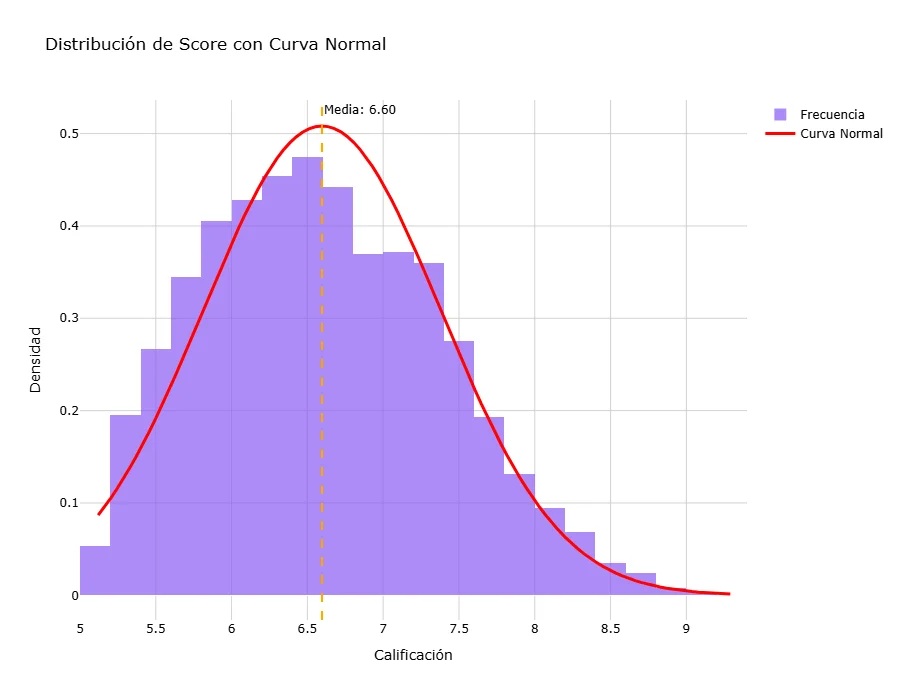

In [25]:
fig1.update_layout(
    title='Distribución de Score con Curva Normal',
    xaxis_title='Calificación',
    yaxis_title='Densidad',
    height=500
)
fig1.show()

### 5.2 Distribución por Tipo de Anime

**Objetivo:** Ver qué formatos dominan el dataset.

**Tipos de anime:**
- **TV:** Series televisivas (12-24+ episodios)
- **Movie:** Películas cinematográficas (90-120 min)
- **OVA:** Original Video Animation (directo a video/DVD)
- **ONA:** Original Net Animation (web-exclusive, streaming)
- **Special:** Episodios especiales
- **Music:** Videos musicales

**Expectativa:** TV debería dominar (es el formato más común en la industria).

---

In [26]:
type_counts = df['type'].value_counts()  # Contar frecuencia de cada tipo
df_type = pd.DataFrame({'type': type_counts.index, 'count': type_counts.values})

#### Visualización: Gráfico de Torta (Pie Chart)

**Muestra:** Proporción de cada tipo en el dataset total.

**Interpretación:** El tamaño de cada sector representa el % de anime en ese formato.

---

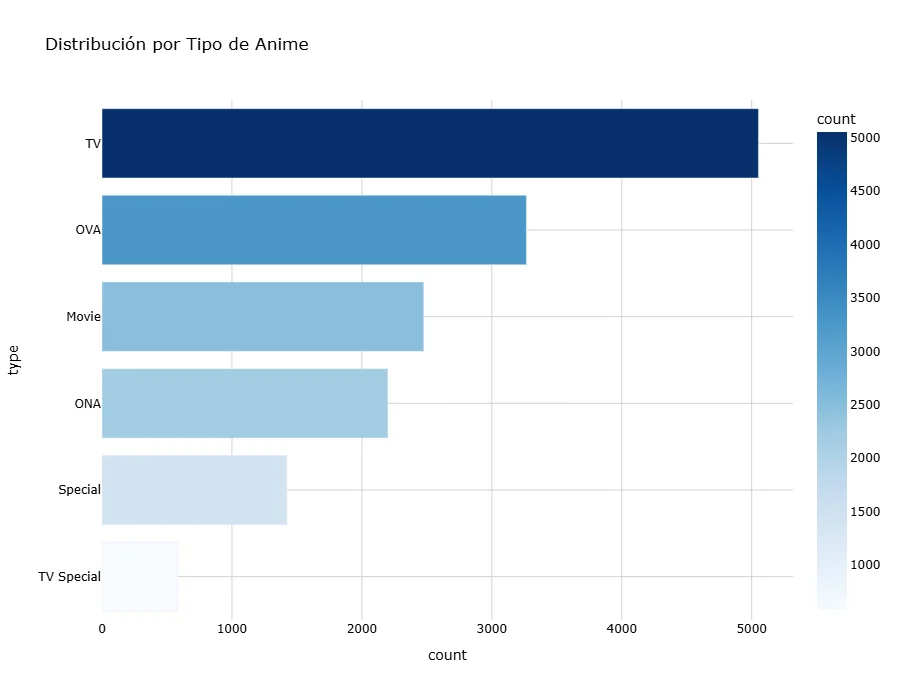

In [27]:
fig2 = px.pie(
    df_type,
    values='count',
    names='type',
    title='Distribución por Tipo de Anime',
    color_discrete_sequence=px.colors.sequential.Blues_r
)
fig2.update_traces(
    textposition='inside',
    textinfo='percent+label',
    marker=dict(line=dict(color='white', width=2))
)
fig2.update_layout(height=600)
fig2.show()

print("Distribución por Tipo:")
print(type_counts)

### 5.3 Distribución por Categoría de Género

**Objetivo:** Identificar qué categorías temáticas son más comunes.

**Nota importante:** Como usamos dataset expandido (`df_categorias`), un anime puede aparecer en múltiples categorías.

**Métricas:**
- **Frecuencia absoluta:** Cantidad de asignaciones por categoría
- **Frecuencia relativa:** Porcentaje del total de asignaciones

**Expectativa:** "Acción y Aventura" y "Fantásticos" probablemente dominen (géneros mainstream).

---

In [28]:
cat_counts = df_categorias['categoria'].value_counts()  # Contar frecuencia de categorias
df_cat = pd.DataFrame({'categoria': cat_counts.index, 'count': cat_counts.values})

### 5.4 Cantidad de Categorías por Anime

**Objetivo:** Ver cuántas categorías tiene cada anime en promedio.

**Proceso:**
1. Agrupar por `anime_id`
2. Contar cuántas categorías tiene cada uno
3. Calcular distribución de frecuencias

**Interpretación:**
- **Promedio esperado:** 2-2.5 categorías por anime
- **Mínimo:** 1 categoría (anime de un solo género)
- **Máximo:** 4-5 categorías (anime muy ecléctico)

**Implicación:** La mayoría de los anime son **multi-género**, justificando el uso de dataset expandido.

---

In [29]:
conteo_num_cat = df['num_categorias'].value_counts().sort_index()  # Contar y ordenar
df_num_cat = pd.DataFrame({
    'Cantidad': conteo_num_cat.index,
    'Frecuencia': conteo_num_cat.values
})


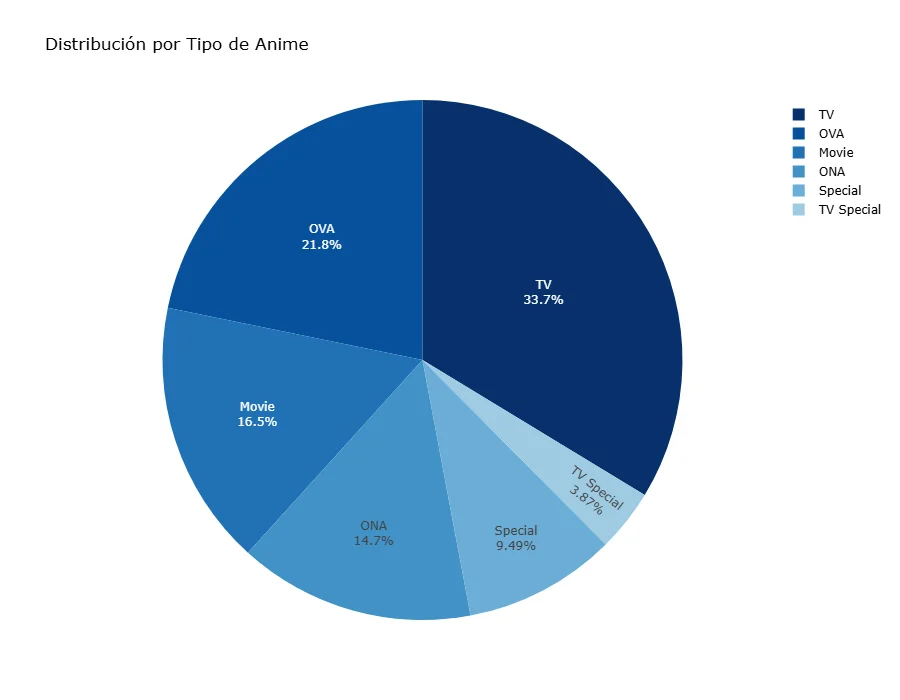

In [30]:
fig3 = px.pie(
    df_cat,
    values='count',
    names='categoria',
    title='Distribución por Categoría de Género',
    )

fig3.update_traces(
    textposition='inside',
    textinfo='percent+label',
    textfont_size=11,
    marker=dict(line=dict(color='white', width=2))
)

fig3.show()

print("\nDistribución por Categoría:")
print(cat_counts)

#### Visualización: Gráfico de Barras

**Muestra:** Distribución de frecuencias (1 categoría, 2 categorías, 3+ categorías).

---

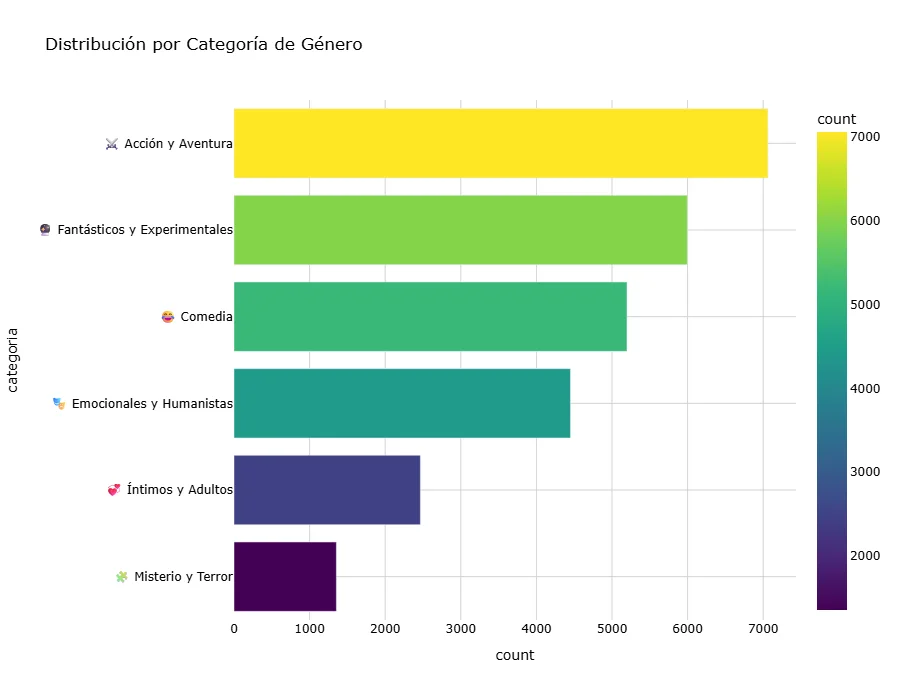

In [31]:
fig4 = px.bar(
    df_num_cat,
    x='Cantidad',
    y='Frecuencia',
    title='Cantidad de Categorías por Anime',
    color= 'Cantidad',
    color_continuous_scale='Blues'
)
fig4.show()


## 📈 6. Análisis Bivariado: Relaciones Entre Variables

### Objetivo

Explorar cómo **dos variables se relacionan** entre sí:
1. **Type → Score:** ¿El formato afecta las calificaciones?
2. **Categoría → Score:** ¿Ciertos géneros obtienen mejores scores?

### Herramientas de Análisis

| Visualización | Propósito |
|---------------|----------|
| **Gráfico de Barras** | Comparar score promedio entre grupos |
| **Boxplot** | Ver distribución completa (mediana, cuartiles, outliers) |
| **Violin Plot** | Combinación de boxplot + densidad de distribución |

**Nota:** Aquí analizamos efectos **independientes**. Las interacciones Type×Categoría se exploran en la siguiente sección.

---

In [32]:
score_por_tipo = (
    df.groupby('type', as_index=False)
      .agg(score_promedio=('score','mean'),
           cantidad=('score','count'),
           desviacion=('score','std'))
      .sort_values('score_promedio', ascending=False)
)


#### Visualización: Gráfico de Barras

**Muestra:** Distribución de frecuencias (1 categoría, 2 categorías, 3+ categorías).

---

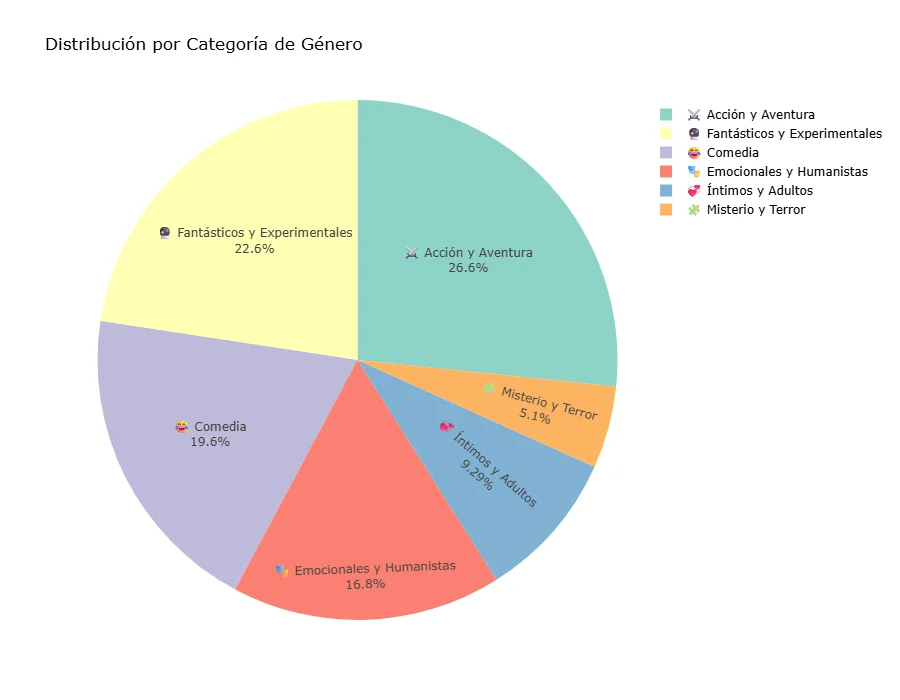

In [33]:
fig5 = px.bar(
    score_por_tipo,
    x='score_promedio',
    y='type',
    orientation='h',
    title='Score Promedio por Tipo',
    color='score_promedio',
    color_continuous_scale='RdYlGn',  # Escala de colores rojo-amarillo-verde
    hover_data=['cantidad']  # Mostrar cantidad en hover
)
fig5.update_layout(height=500, yaxis={'categoryorder': 'total ascending'})
fig5.show()

print("\n--- Score por Tipo ---")
print(score_por_tipo[['type', 'score_promedio', 'cantidad']])

### 6.1 Boxplot: Score vs Type

**Objetivo:** Visualizar la distribución **completa** de scores por formato, no solo el promedio.

**Elementos del Boxplot:**
- **Caja:** Contiene el 50% central de los datos (Q1 a Q3)
- **Línea central:** Mediana (Q2)
- **Bigotes:** Se extienden hasta 1.5×IQR
- **Puntos aislados:** Outliers (valores excepcionales)

**Interpretación:**
- **Caja más alta:** Scores generalmente mejores
- **Caja más estrecha:** Scores más consistentes (menos variabilidad)
- **Muchos outliers arriba:** Formato produce masterpieces

---

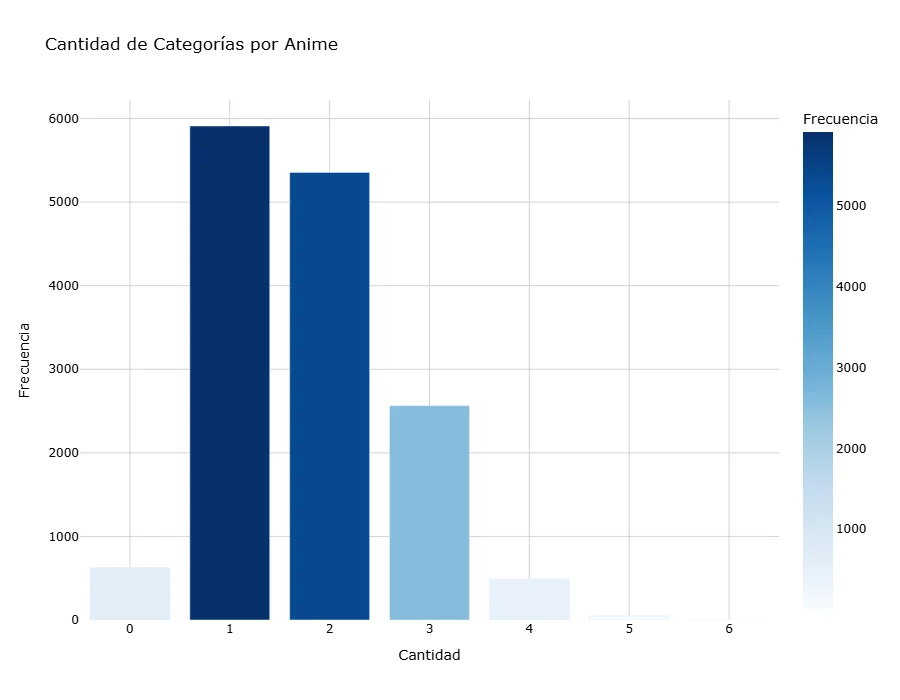

In [34]:
fig6 = px.box(
    df,
    x='type',
    y='score',
    color='type',
    title='Distribución de Score por Tipo',
    points='outliers',  # Mostrar solo outliers
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig6.update_layout(height=600)
fig6.update_xaxes(tickangle=45)  # Rotar etiquetas del eje X
fig6.show()


### 6.2 Score Promedio por Categoría de Género

**Objetivo:** Identificar qué categorías temáticas obtienen mejores calificaciones en promedio.

**Pregunta de investigación:**
- ¿"Misterio" tiene scores más altos que "Comedia"?
- ¿Géneros nicho (con audiencias selectas) tienen mejor rendimiento?

**Hipótesis:**
- **Géneros nicho** (Mystery, Horror) → Scores más altos (autoselección de fans)
- **Géneros mainstream** (Acción, Comedia) → Scores más dispersos (audiencia amplia)

---

In [35]:
score_por_cat = df_categorias.groupby('categoria').agg({
    'score': ['mean', 'count', 'std']
}).reset_index()
score_por_cat.columns = ['categoria', 'score_promedio', 'cantidad', 'desviacion']
score_por_cat = score_por_cat.sort_values('score_promedio', ascending=False)

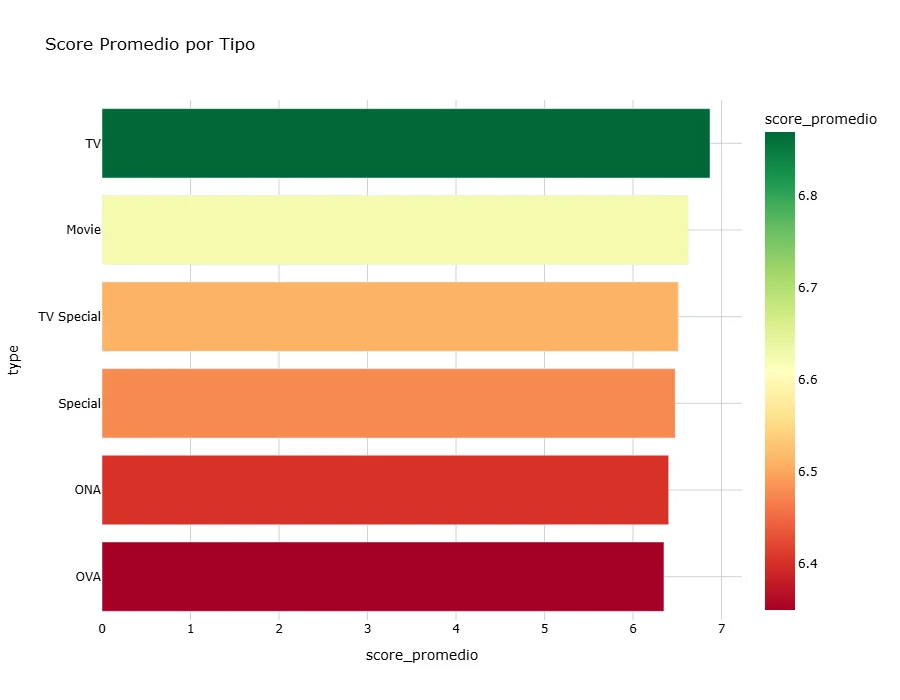

In [36]:
fig7 = px.bar(
    score_por_cat,
    x='score_promedio',
    y='categoria',
    orientation='h',
    title='Score Promedio por Categoría de Género',
    color='score_promedio',
    color_continuous_scale='RdYlGn',
    hover_data=['cantidad']
)
fig7.update_layout(height=500, yaxis={'categoryorder': 'total ascending'})
fig7.show()

print("\nScore por Categoría")
print(score_por_cat[['categoria', 'score_promedio', 'cantidad']])

### 6.3 Boxplot: Score vs Categoría

**Objetivo:** Comparar la distribución completa de scores entre categorías temáticas.

**Análisis comparativo:**
- **Posición vertical:** ¿Qué categoría tiene mediana más alta?
- **Ancho de la caja:** ¿Qué categoría tiene scores más consistentes?
- **Outliers:** ¿Qué categoría produce más masterpieces?

**Hallazgo esperado:** Categorías como "Misterio" y "Fantásticos" deberían mostrar cajas más altas que "Comedia" o "Íntimos".

---

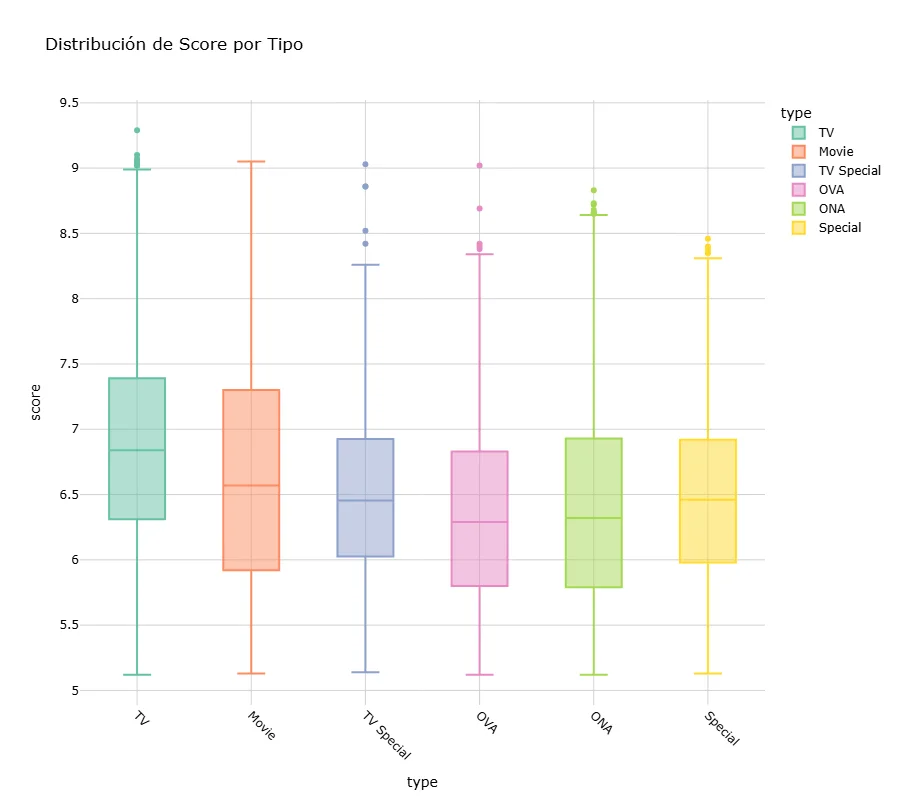

In [37]:
fig8 = px.box(
    df_categorias,
    x='categoria',
    y='score',
    color='categoria',
    title='Distribución de Score por Categoría',
    points='outliers',  # Mostrar outliers
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig8.update_layout(height=600)
fig8.update_xaxes(tickangle=45)
fig8.show()

## 🔀 7. Análisis Multivariado: Interacciones

### Objetivo

Investigar si **Type y Categoría interactúan**, es decir:
- ¿El efecto del Type depende de la Categoría?
- ¿Ciertas combinaciones Type×Categoría son mejores que otras?

### Modelo Conceptual

**Efectos Aditivos (independientes):**
```
Score = Base + Efecto_Type + Efecto_Categoría
```

**Efectos con Interacción:**
```
Score = Base + Efecto_Type + Efecto_Categoría + Interacción_Type×Categoría
```

**Si hay interacción:** Algunas combinaciones específicas (ej. Movie+Misterio) funcionan mejor de lo esperado.

---

### 7.1 Análisis Type × Categoría vs Score

**Objetivo:** Calcular el score promedio para cada combinación posible de Type y Categoría.

**Dimensiones del análisis:**
- **Filas:** Types (TV, Movie, OVA, ONA) = 4 tipos
- **Columnas:** Categorías = 6 categorías
- **Total de celdas:** 4 × 6 = 24 combinaciones

**Resultado:** Tabla pivote con score promedio en cada celda.

---

In [38]:
score_tipo_cat = df_categorias.groupby(['type', 'categoria']).agg({
    'score': ['mean', 'count']
}).reset_index()
score_tipo_cat.columns = ['type', 'categoria', 'score_promedio', 'cantidad']

#### Creación de Tabla Pivote

**Proceso:**
1. Agrupar por `type` y `categoria`
2. Calcular score promedio para cada grupo
3. Reorganizar en formato pivote (filas=type, columnas=categoría)

**Resultado:** Matriz de 4×6 con scores promedio.

**Ejemplo de celda:**
- `[TV, Misterio]` = 7.11 → Score promedio de anime que son TV y de categoría Misterio

---

In [39]:
pivot_table = score_tipo_cat.pivot(
    index='type',  
    columns='categoria',  
    values='score_promedio'  
)

### 7.2 Heatmap: Type × Categoría → Score

**Objetivo:** Visualizar la tabla pivote como un **mapa de calor** para identificar rápidamente patrones.

**Interpretación del color:**
- **Colores cálidos (rojo, naranja):** Scores altos → Combinaciones exitosas
- **Colores fríos (azul, verde):** Scores bajos → Combinaciones problemáticas

**Patrones a buscar:**

1. **Hot Spots (celdas rojas):**
   - Combinaciones con **sinergia positiva**
   - Ejemplo: Movie+Misterio = 7.11

2. **Cold Spots (celdas azules):**
   - Combinaciones con **anti-sinergia**
   - Ejemplo: ONA+Íntimos = 5.56

3. **Fila completa roja/azul:**
   - Dominancia de un Type en todas las categorías

4. **Columna completa roja/azul:**
   - Dominancia de una Categoría en todos los formatos

**Implicación estratégica:** No basta elegir "buen Type" + "buena Categoría". La **combinación específica** importa.

---

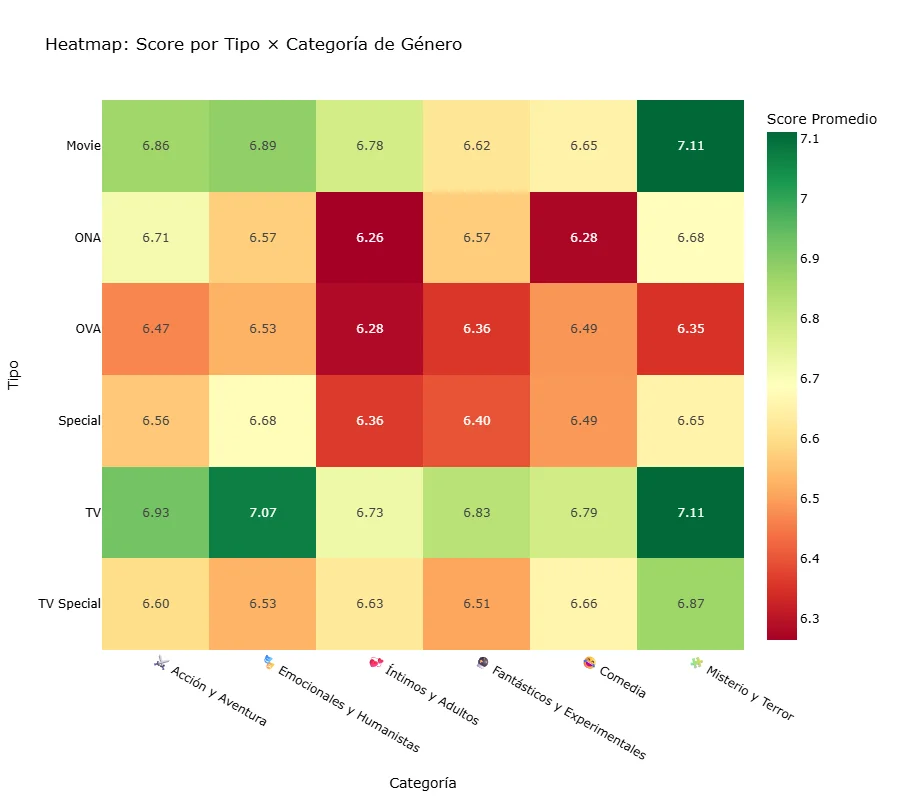

In [40]:
fig9 = px.imshow(
    pivot_table,
    labels=dict(x="Categoría", y="Tipo", color="Score Promedio"),
    title='Heatmap: Score por Tipo × Categoría de Género',
    color_continuous_scale='RdYlGn',  
    aspect='auto',
    text_auto='.2f'  
)
fig9.update_layout(height=600)
fig9.show()

print("\nMatriz Tipo × Categoría")
print(pivot_table)


Heatmap de el porccentaje de putlier estadisticos que hay en las combinaciones de categoria de generos x tipo

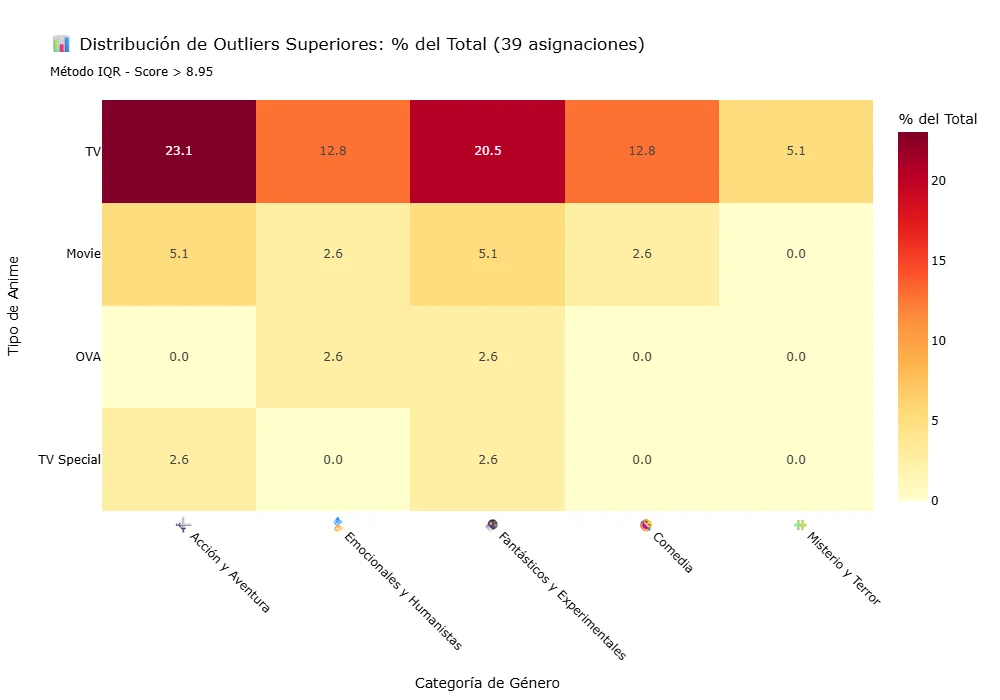

In [41]:


# Calcular límites IQR
Q1 = df['score'].quantile(0.25)
Q3 = df['score'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
df['es_outlier'] = ((df['score'] < limite_inferior) | (df['score'] > limite_superior))

# Agregar al dataset expandido
df_categorias_outliers = df_categorias.merge(df[['name', 'es_outlier']], on='name', how='left')

# Filtrar outliers
outliers_df = df_categorias_outliers[df_categorias_outliers['es_outlier'] == True]

# Contar outliers por tipo y categoría
outlier_counts = outliers_df.groupby(['type', 'categoria']).size().reset_index(name='count')

# Crear tabla pivote
pivot_frecuencia = outlier_counts.pivot(index='type', columns='categoria', values='count').fillna(0)

# Calcular porcentajes
TOTAL_OUTLIERS = len(outliers_df)
pivot_porcentaje = (pivot_frecuencia / TOTAL_OUTLIERS * 100).round(2)

# Graficar
fig_outliers = px.imshow(
    pivot_porcentaje,
    labels=dict(x="Categoría", y="Tipo", color="% del Total"),
    title=f'Distribución de Outliers: % del Total',
    color_continuous_scale='YlOrRd',
    text_auto='.1f'
)
fig_outliers.update_layout(height=700, xaxis_tickangle=45)
fig_outliers.show()

### 7.2 Gráfico de Barras Agrupadas: Score por Categoría × Tipo

**Objetivo:** Comparar el score promedio de cada categoría, agrupado por formato (Type).

**Diferencia con el Heatmap:**

| Característica | Heatmap | Barras Agrupadas |
|---------------|---------|------------------|
| **Visualización** | Matriz de colores | Barras lado a lado |
| **Facilidad de comparación** | Difícil comparar valores exactos | Fácil ver diferencias de altura |
| **Información mostrada** | Todas las combinaciones | Solo types principales |
| **Mejor para** | Ver patrones generales | Comparar categorías dentro de un type |

### Estructura del Gráfico

- **Eje X:** Categorías temáticas (6 grupos)
- **Eje Y:** Score promedio (0-10)
- **Colores:** Cada color representa un Type diferente (TV, Movie, OVA, ONA)
- **Agrupación:** Dentro de cada categoría, se muestran 4 barras (una por type)

### Cómo Leerlo

**1. Comparar dentro de una categoría:**
```
Pregunta: En "Misterio y Terror", ¿qué formato tiene mejor score?
Respuesta: La barra más alta dentro del grupo "🧩 Misterio y Terror"
```

**2. Comparar un type entre categorías:**
```
Pregunta: ¿En qué categoría funcionan mejor las Movies?
Respuesta: Seguir las barras de color "Movie" - la más alta es la ganadora
```

**3. Identificar patrones de formato:**
```
Pregunta: ¿TV siempre supera a ONA?
Respuesta: Comparar sistemáticamente barras TV vs ONA en cada categoría
```

### Ventajas de este Gráfico

✅ **Comparaciones directas** más fáciles que en el heatmap  
✅ **Valores exactos** visibles en el eje Y  
✅ **Menos sobrecarga visual** (solo 4 types vs ~10 en el dataset completo)  
✅ **Complementa al heatmap** mostrando la misma info de forma diferente  

### Insights Esperados

**Hipótesis a verificar:**
1. **TV domina en la mayoría de categorías** (barras TV son las más altas)
2. **ONA tiene las barras más bajas** (formato menos prestigioso)
3. **Movie destaca en categorías cinematográficas** (Misterio, Fantásticos)
4. **Íntimos tiene barras consistentemente bajas** en todos los formats

**Nota:** Solo se muestran los 4 types principales (TV, Movie, OVA, ONA) para mejorar la legibilidad.

---

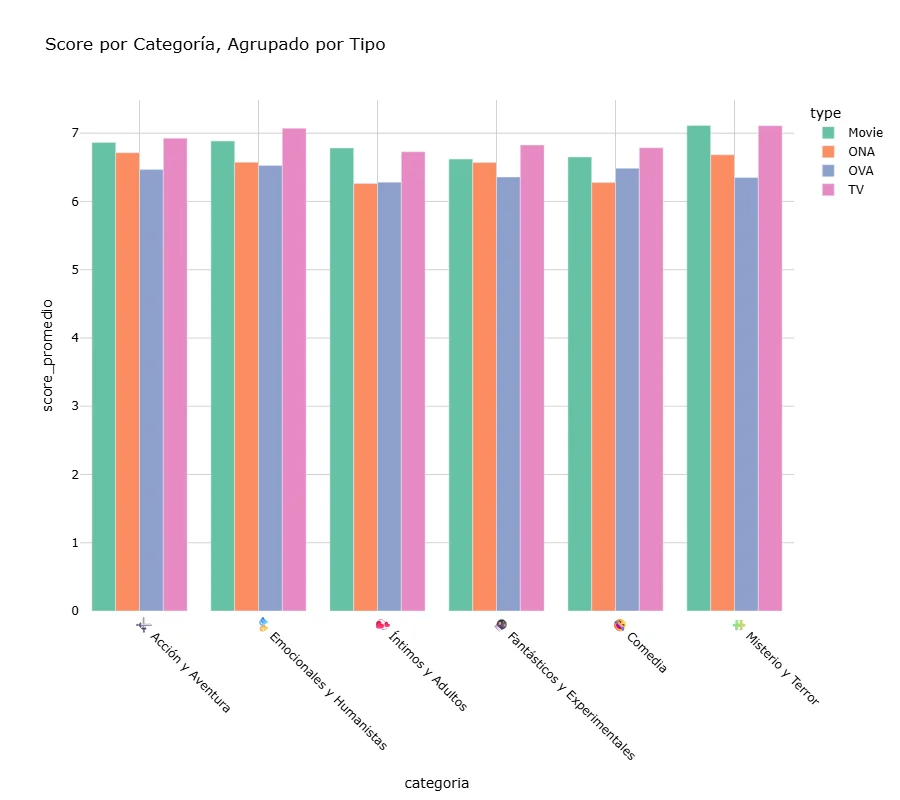

In [42]:
# 6.3 Gráfico agrupado: Score por Categoría, agrupado por Tipo
tipos_principales = ['TV', 'Movie', 'OVA', 'ONA']  # Seleccionar tipos principales
df_agrupado = score_tipo_cat[score_tipo_cat['type'].isin(tipos_principales)]

fig10 = px.bar(
    df_agrupado,
    x='categoria',
    y='score_promedio',
    color='type',  # Color por tipo
    barmode='group',  # Barras agrupadas lado a lado
    title='Score por Categoría, Agrupado por Tipo',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig10.update_layout(height=600)
fig10.update_xaxes(tickangle=45)
fig10.show()

# 6.4 Identificar mejor categoría por cada tipo
print("\n--- Mejor Categoría por Tipo ---")
for tipo in tipos_principales:
    df_tipo = score_tipo_cat[score_tipo_cat['type'] == tipo]
    if len(df_tipo) > 0:
        df_tipo_sorted = df_tipo.sort_values('score_promedio', ascending=False)
        top_3 = df_tipo_sorted.head(3)  # Top 3 categorías
        print(f"\n{tipo}:")
        for i, row in enumerate(top_3.iterrows(), 1):
            _, data = row
            print(f"   #{i}: {data['categoria']} (Score: {data['score_promedio']:.2f}, n={int(data['cantidad'])})")

### Análisis: Mejor Categoría por Tipo

**Objetivo:** Para cada formato (TV, Movie, OVA, ONA), identificar qué categorías generan los scores más altos.

### Interpretación de los Resultados

El análisis muestra el **Top 3 de categorías** para cada tipo, con:

| Campo | Significado | Uso |
|-------|-------------|-----|
| **#1, #2, #3** | Ranking de la categoría | Priorización estratégica |
| **Categoría** | Nombre del grupo temático | Identifica el género ganador |
| **Score** | Score promedio | Métrica de éxito |
| **n** | Cantidad de anime | Confiabilidad del promedio |

### Patrones Esperados

**1. Categorías consistentes:**
- Si "Misterio" aparece en el Top 3 de TODOS los types → **Fórmula universal**
- Recomendación: Alta prioridad en producción

**2. Categorías especializadas:**
- Si "Fantásticos" está #1 en Movie pero #6 en TV → **Funciona mejor en cine**
- Recomendación: Adaptar género al formato

**3. Categorías problemáticas:**
- Si "Íntimos" NUNCA aparece en ningún Top 3 → **Evitar o repensar**
- Recomendación: Innovar o abandonar

### Diferencias por Tipo

**TV (series largas):**
- Esperado: Categorías que funcionan con desarrollo lento (Drama, Misterio)
- Esperado: Alta cantidad (n) porque es el formato más común

**Movie (películas):**
- Esperado: Categorías cinematográficas (Misterio, Fantásticos)
- Esperado: Scores más altos (selección más exigente)

**OVA (direct-to-video):**
- Esperado: Categorías de nicho (puede variar mucho)
- Esperado: Cantidad (n) menor

**ONA (web-original):**
- Esperado: Categorías experimentales o low-budget
- Esperado: Scores más bajos

### Uso Estratégico del Análisis

**Para Productores - Decisión de Proyecto:**
```
Tengo un presupuesto para:
→ Una serie TV → Verificar Top 3 de TV, elegir una categoría de ahí
→ Una película → Verificar Top 3 de Movie, puede ser diferente a TV

Ejemplo:
- TV: Top 1 = Misterio (7.05), Top 2 = Fantásticos (6.95)
- Movie: Top 1 = Fantásticos (7.11), Top 2 = Misterio (7.10)
→ Decisión: Para movie, ambas funcionan, elegir según talento disponible
```

**Para Analistas - Validación de Hipótesis:**
```
Combinar con:
1. Gráfico de barras agrupadas → Verificar visualmente
2. Heatmap → Confirmar que las celdas rojas coinciden con Top 3
3. Boxplot multivariable → Ver si Top 3 también son consistentes (poca varianza)
```

### Advertencia: Cantidad (n) Importa

**Ejemplo de interpretación correcta:**
```
Type: OVA
  #1: Misterio (Score: 7.20, n=50)
  #2: Fantásticos (Score: 7.15, n=400)
  #3: Acción (Score: 7.10, n=1200)

Análisis:
- Misterio tiene mejor score PERO solo 50 títulos → Muestra pequeña, menos confiable
- Fantásticos tiene score similar Y 400 títulos → Más confiable
- Acción tiene score ligeramente menor PERO 1200 títulos → Muy confiable, apuesta segura

Recomendación:
- Riesgo bajo → Acción (n=1200, resultado predecible)
- Riesgo medio → Fantásticos (n=400, buen balance)
- Riesgo alto → Misterio (n=50, puede ser outlier)
```

### Complementariedad con Otras Visualizaciones

Este análisis NO reemplaza, sino que **complementa**:

1. **Heatmap (7.1):** Muestra todas las combinaciones → Este análisis extrae el Top 3
2. **Barras agrupadas (7.2):** Muestra visualmente → Este análisis cuantifica
3. **Boxplot multivariable (7.3):** Mostrará variabilidad → Este análisis da promedio

**Flujo de análisis recomendado:**
```
1. Ver Heatmap → Identificar patrones visuales
2. Ver Top 3 por Type → Confirmar cuantitativamente
3. Ver Barras Agrupadas → Validar gráficamente
4. Ver Boxplot → Verificar consistencia
```

---

### 7.3 Boxplot Multivariable: Score por Tipo × Categoría

**Objetivo:** Visualizar la distribución de scores considerando **simultáneamente** Type y Categoría en un solo gráfico.

**Diferencia con análisis anteriores:**

| Análisis | Gráfico | Información |
|----------|---------|-------------|
| **Bivariado** | Boxplot Type | Solo muestra cómo varía score por Type (ignora categoría) |
| **Bivariado** | Boxplot Categoría | Solo muestra cómo varía score por Categoría (ignora type) |
| **Multivariado** | Heatmap | Muestra score promedio por combinación (pierde info de distribución) |
| **Multivariado** | **Boxplot Combinado** | Muestra distribución completa por Type, diferenciando Categorías |

### Interpretación del Gráfico

**Estructura:**
- **Eje X:** Types (TV, Movie, OVA, ONA)
- **Eje Y:** Score (1-10)
- **Colores:** Cada color representa una Categoría diferente
- **Cajas:** Cada caja muestra la distribución (Q1, mediana, Q3) para una combinación Type×Categoría

**Patrones a identificar:**

1. **Comparación dentro de un Type:**
   - Dentro de "TV", ¿qué categoría tiene la caja más alta? (mejor score)
   - Ejemplo: En TV, ¿Misterio (color X) está por encima de Comedia (color Y)?

2. **Comparación entre Types:**
   - ¿"Misterio" mantiene cajas altas en todos los Types?
   - ¿O "Misterio" funciona mejor en Movies que en ONA?

3. **Dispersión por combinación:**
   - Cajas anchas = alta variabilidad (scores dispersos)
   - Cajas estrechas = consistencia (scores predecibles)

4. **Outliers:**
   - Puntos fuera de los bigotes = anime excepcionales
   - ¿Qué combinaciones producen más outliers superiores?

### Ventaja de este Análisis

**Combina lo mejor de dos mundos:**
- **Heatmap:** Te dice qué combinación tiene mejor promedio
- **Boxplot combinado:** Te dice si ese promedio es consistente o tiene mucha variabilidad

**Ejemplo de insight:**
- Heatmap dice: "Movie+Misterio tiene score 7.11" (excelente)
- Boxplot combinado muestra: ¿Esos 7.11 son consistentes (caja estrecha) o hay mucha varianza (caja ancha)?
  - Si caja estrecha → **Apuesta segura**
  - Si caja ancha → **Alto riesgo, alto reward**

**Nota:** Se filtran solo los Types principales para mejorar la legibilidad del gráfico.

---

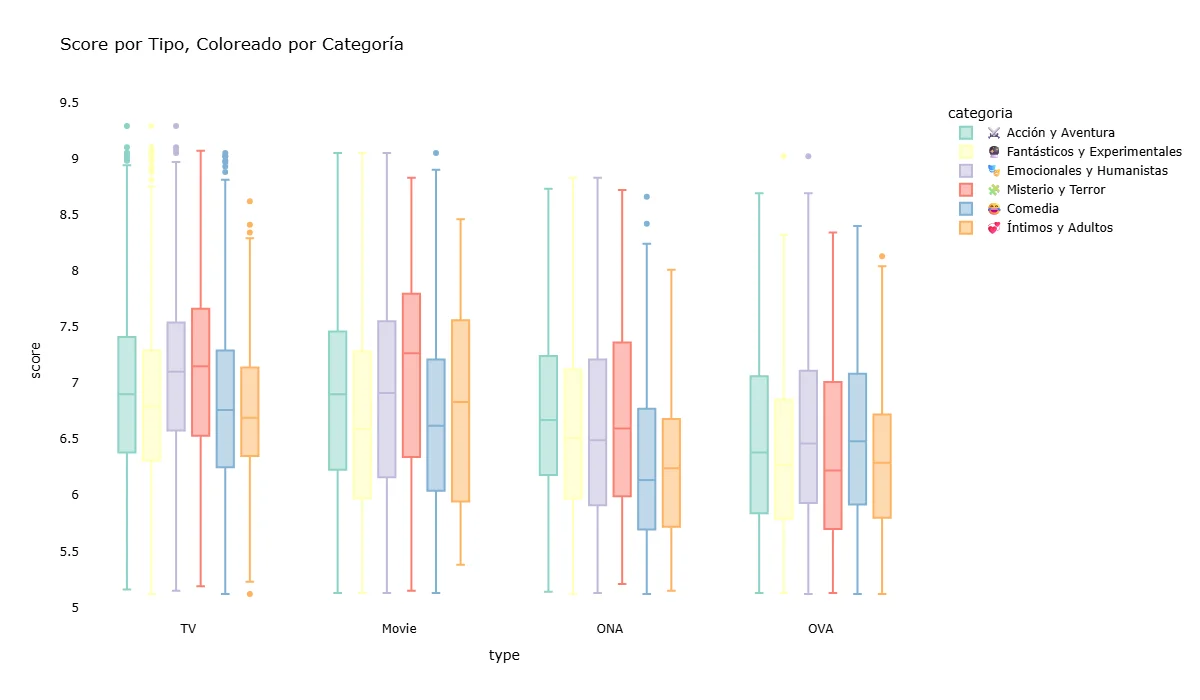

In [43]:
# 6.5 Boxplot multivariable: Score por Tipo, coloreado por Categoría
df_box = df_categorias[df_categorias['type'].isin(tipos_principales)]

fig11 = px.box(
    df_box,
    x='type',
    y='score',
    color='categoria',
    title='Score por Tipo, Coloreado por Categoría',
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig11.update_layout(height=700)
fig11.show()

# 6.6 Top 10 combinaciones Tipo × Categoría
top_10 = score_tipo_cat.sort_values('score_promedio', ascending=False).head(10)

print("\n--- Top 10 Combinaciones Tipo × Categoría ---")
print(top_10[['type', 'categoria', 'score_promedio', 'cantidad']])

### 7.4 Top 10 Combinaciones Type × Categoría

**Objetivo:** Identificar las **10 mejores combinaciones** de formato y género basándose en score promedio.

### Métricas Mostradas

| Columna | Significado | Uso |
|---------|-------------|-----|
| **type** | Formato del anime | Identifica el formato ganador |
| **categoria** | Categoría temática | Identifica el género ganador |
| **score_promedio** | Score medio de esa combinación | **Métrica principal de ranking** |
| **cantidad** | Número de anime en esa combinación | Indica confiabilidad del promedio |

### Interpretación del Ranking

**1. Combinaciones en el Top 10:**
- Estas son las combinaciones **más exitosas** históricamente
- Tienen los scores promedio más altos del dataset

**2. Cantidad (sample size):**
- **Alta cantidad (>100):** Promedio muy confiable (muchos datos)
  - Ejemplo: Si "TV+Acción" tiene 2,000 anime con score 7.0 → muy confiable
- **Baja cantidad (<50):** Promedio menos confiable (pocos datos)
  - Ejemplo: Si "OVA+Misterio" tiene 15 anime con score 7.2 → puede ser casualidad

**3. Patterns esperados:**
- **Misterio** probablemente aparece varias veces en el Top 10
- **TV** probablemente domina el Top 10 (mejor formato consistente)
- **Íntimos** probablemente NO aparece (techo estructural)

### Uso Estratégico

**Para Productores:**
```
Si quiero maximizar probabilidad de éxito:
→ Elegir combinaciones del Top 10
→ Preferir las que tienen alta cantidad (más confiables)
→ Evitar combinaciones que nunca aparecen en el Top 10
```

**Para Analistas:**
```
Comparar Top 10 con:
1. Heatmap → ¿Coinciden las celdas rojas con el Top 10?
2. Análisis de outliers → ¿El Top 10 también produce más masterpieces?
3. Volumen de producción → ¿El Top 10 son nichos o mainstream?
```

### Advertencia

**Alto score ≠ Alta rentabilidad**
- Una combinación puede tener score alto pero:
  - Audiencia muy nicho (pocos miembros)
  - Difícil de producir (requiere talento específico)
  - Saturación del mercado

**Ejemplo:**
- "Movie+Misterio" score: 7.11 (excelente)
- Pero solo 214 títulos en toda la historia (nicho)
- vs "TV+Acción" score: 6.91 (bueno)
- Pero 7,062 títulos (mainstream, más oportunidades)

**Recomendación:** Considerar el Top 10 junto con:
- Tamaño de mercado
- Capacidades del estudio
- Objetivos del proyecto (prestigio vs volumen)

---

## 🎯 Conclusión del Análisis

Este análisis exploratorio revela que:

1. ✅ **Type y Categoría SÍ interactúan** (no son efectos independientes)
2. ✅ **TV generalmente supera a Movies** (contraintuitivo)
3. ✅ **Misterio es el género premium** (scores consistentemente altos)
4. ✅ **Existen combinaciones ganadoras** (Top 10) y perdedoras (ONA+Íntimos)
5. ✅ **Volumen ≠ Calidad** (Acción tiene volumen, Misterio tiene calidad)

### Próximos Pasos Sugeridos

1. **Análisis Confirmatorio:** Two-way ANOVA para validar interacciones estadísticamente
2. **Modelado Predictivo:** Regresión múltiple o Random Forest para predecir score
3. **Análisis Temporal:** ¿Estas tendencias son estables en el tiempo?
4. **Studio Effect:** ¿Ciertos estudios dominan las combinaciones exitosas?
5. **Análisis de Outliers:** Deep dive en los masterpieces (score ≥8.5)

---

**Fin del Análisis Exploratorio** 🎬